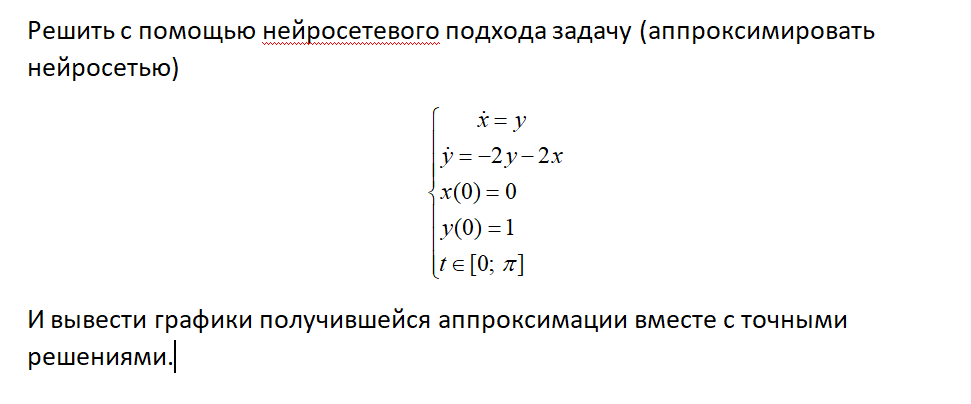

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

import torch.optim as optim
from torch.autograd import grad

import matplotlib.pyplot as plt

In [ ]:
batch_size=1000
a=0
b=np.pi

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,45)
        self.fc2 = nn.Linear(45,45)
        self.fc3 = nn.Linear(45,25) 
        self.fc4 = nn.Linear(25,25)
        self.fc5 = nn.Linear(25,1)     
    def forward(self, x):
        x = F.softplus(self.fc1(x))
        x = F.softplus(self.fc2(x))
        x = F.softplus(self.fc3(x))    
        x = F.softplus(self.fc4(x))
        x = self.fc5(x)

    return x
    
net = Net()
net

In [ ]:
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [ ]:
x_0=torch.ones((batch_size,1),requires_grad=True)*a
y_0_train=torch.ones((batch_size,1))*0
dy_0_train=torch.ones((batch_size,1))*1

loss=nn.MSELoss()

for epoch in range(1000):
    optimizer.zero_grad()
    train_x=torch.rand((batch_size,1),requires_grad=True,dtype=torch.float)*(b-a)+a
    y_hat = net(train_x)     
       
    dy_hat=grad(y_hat,train_x,torch.ones(batch_size,1),allow_unused=True,retain_graph=True,create_graph=True)[0]    
    ddy_hat=grad(dy_hat,train_x,torch.ones(batch_size,1),allow_unused=True,retain_graph=True,create_graph=True)[0]
    
    y_0=net(x_0)
    dy_0=grad(y_0,x_0,torch.ones(batch_size,1),allow_unused=True,retain_graph=True,create_graph=True)[0]
    
    Loss=loss(ddy_hat + 2*dy_hat + 2*y_hat,torch.zeros(batch_size,1))+loss(y_0,y_0_train)+loss(dy_0,dy_0_train)
    
    Loss.backward(retain_graph=True)
    optimizer.step()
    if epoch % 100 == 99: 
        print('[%d], loss: %.10f'%(epoch+1,Loss.item()))

In [ ]:
def exact(x):
    return torch.exp(-x)*torch.sin(x)

train_x=torch.linspace(a, b, batch_size).view(-1,1)
y=exact(train_x)
y_net=net(train_x)

plt.figure(figsize=(5, 5))
plt.plot(train_x.detach().numpy(),y.detach().numpy(),'g-',label="exact")
plt.plot(train_x.detach().numpy(),y_net.detach().numpy(),'k:',label="net") 
plt.legend ()